# Martingale Betting Theory, Volatility Mean Reversion

## Introduction

This notebook explores:
1. The **Martingale strategy** in gambling and trading.
2. **Volatility mean reversion**, simulated using the Ornstein-Uhlenbeck process.
3. Application of Martingale to **volatility trading**

Volatility, measured by the VIX index, exhibits mean-reverting behavior, making it suitable for strategies that assume a return to the average over time. We'll use Python to:
- Simulate mean-reverting volatility.
- Fetch real-world VIX data.
- Simulate a short position using the Martingale strategy.


## Martingale Strategy in Roulette

The Martingale strategy assumes the following:
1. You bet on an outcome with a 50% probability (e.g., red or black in roulette).
2. After every loss, you double your bet.
3. On a win, you recover all previous losses and gain a profit equal to your initial bet.

### Mathematical Representation

Let the initial bet be $b$. After \(n\) losses, the total amount wagered is:

$$
T_n = b + 2b + 4b + \ldots + 2^n b = b \cdot (2^{n+1} - 1)
$$

If the \(n+1\)th bet is a win, your total profit is:

$$
P = b - T_n + 2^n b
$$

This strategy assumes infinite capital and zero table limits, which is unrealistic in practice.


### Expected Value of the Martingale Strategy

The expected value ($\mathbb{E}[P]$) of the Martingale strategy is calculated as:

$$
\mathbb{E}[P] = \sum_{n=0}^\infty P(\text{Win on } n+1) \cdot (\text{Profit from } n+1)
$$

Substitute the probability of winning on the $n+1$-th round $P(\text{Win on } n+1) = p^n (1-p)$, and the profit from the $n+1$-th round $P = b$ (initial bet size):

$$
\mathbb{E}[P] = \sum_{n=0}^\infty p^n (1-p) \cdot b
$$

Factor out constants $b$ and $(1-p)$:

$$
\mathbb{E}[P] = b \cdot (1-p) \cdot \sum_{n=0}^\infty p^n
$$

The sum of the geometric series $\sum_{n=0}^\infty p^n$ is:

$$
\sum_{n=0}^\infty p^n = \frac{1}{1-p}, \quad \text{for } |p| < 1
$$

Substituting this result:

$$
\mathbb{E}[P] = b \cdot (1-p) \cdot \frac{1}{1-p}
$$

Simplify:

$$
\mathbb{E}[P] = b
$$

Thus, the expected value of the Martingale strategy is exactly the initial bet size $b$.


### Losing Streak Devastation in the Martingale Strategy

The total wagered after $n$ consecutive losses is given by:

$$
T_n = b + 2b + 4b + \ldots + 2^n b
$$

This is a geometric series with $n+1$ terms. The sum of the series is:

$$
T_n = b \cdot (2^{n+1} - 1)
$$

If the bankroll is insufficient to cover the total wagered after $n$ losses, the strategy fails. The required bankroll grows exponentially with $n$:

$$
T_n \text{ (total wagered)} \propto 2^n
$$

For example:
- After 10 losses: 
  $$ 
  T_{10} = b \cdot (2^{10+1} - 1) = b \cdot 2047 
  $$
- After 20 losses: 
  $$ 
  T_{20} = b \cdot (2^{20+1} - 1) = b \cdot 2,097,151 
  $$

Thus, even for modest initial bets ($b$), a long losing streak can lead to exponential growth in required bets and total losses.


In [79]:
import random

def roulette_martingale(initial_bet, max_rounds, bankroll):
    current_bet = initial_bet
    total_bet = 0
    rounds = 0

    while rounds < max_rounds and bankroll > 0:
        total_bet += current_bet
        outcome = random.choice(["win", "lose"])
        if outcome == "win":
            bankroll += current_bet
            print(f"Round {rounds + 1}: Win! Bankroll = ${bankroll}")
            break
        else:
            bankroll -= current_bet
            current_bet *= 2
            print(f"Round {rounds + 1}: Loss. Bankroll = ${bankroll}")
        rounds += 1

    if bankroll <= 0:
        print("Bankrupt! The Martingale strategy failed.")
    else:
        print(f"Strategy succeeded in {rounds + 1} rounds.")
    
    return bankroll

# Parameters
initial_bet = 10
max_rounds = 10
bankroll = 1000

roulette_martingale(initial_bet, max_rounds, bankroll)


Round 1: Win! Bankroll = $1010
Strategy succeeded in 1 rounds.


1010

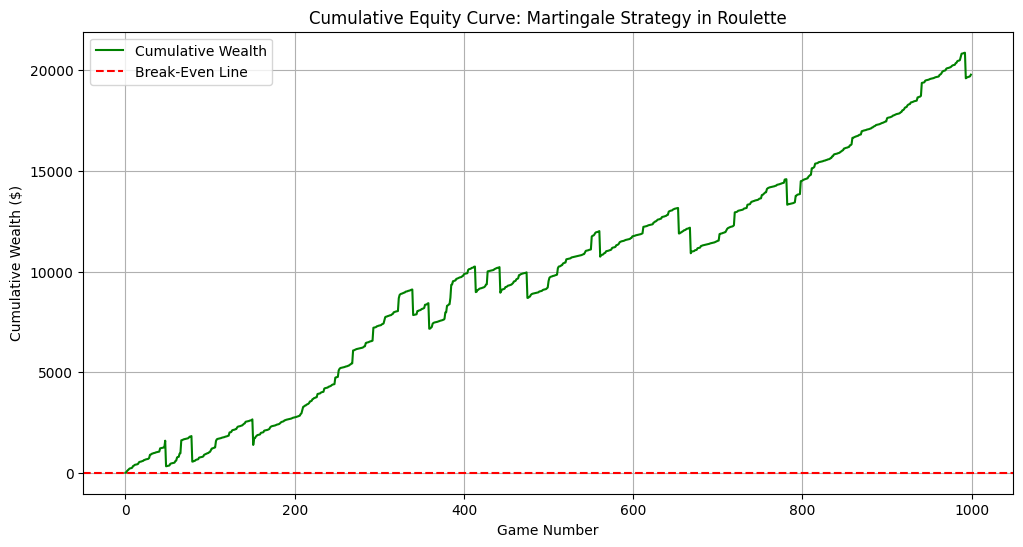

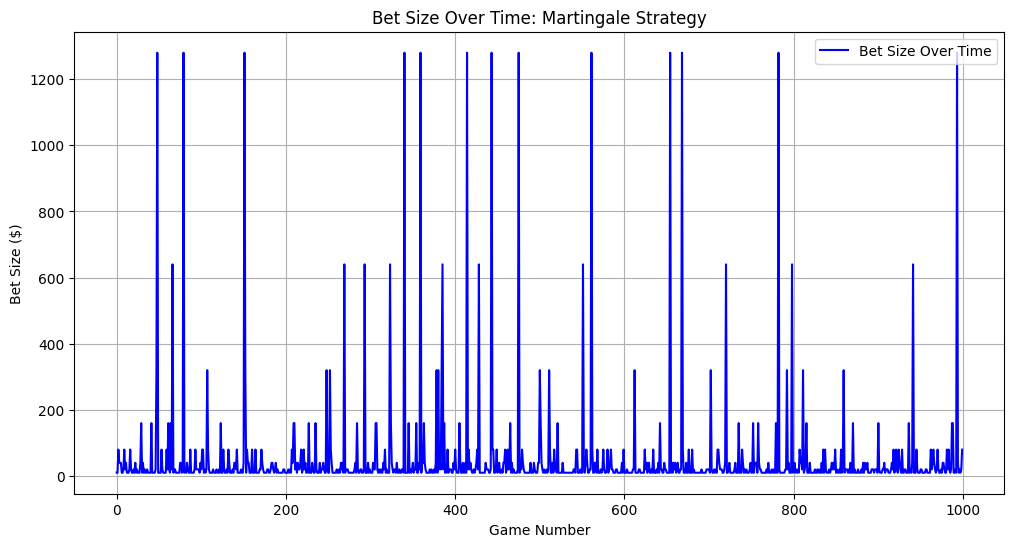

In [80]:
import matplotlib.pyplot as plt
import numpy as np

def roulette_martingale_simulation_with_bets(initial_bet, bankroll, max_rounds, num_games):
    cumulative_wealth = []
    bets_over_time = []
    total_wealth = 0  # Tracks accumulated wealth across games

    for _ in range(num_games):
        current_bet = initial_bet
        game_bankroll = bankroll
        total_wagered = 0
        game_result = None

        for round_number in range(max_rounds):
            total_wagered += current_bet
            outcome = np.random.choice(["win", "lose"])

            if outcome == "win":
                game_bankroll += current_bet
                total_wealth += current_bet  # Profit is the initial bet amount
                game_result = "win"
                break
            else:
                game_bankroll -= current_bet
                current_bet *= 2

            # If bankroll is depleted, stop the game
            if game_bankroll <= 0:
                game_result = "lose"
                break

        # If the game ends in a loss, subtract the total wagered
        if game_result == "lose":
            total_wealth -= total_wagered

        # Append the cumulative wealth and the last bet for the game
        cumulative_wealth.append(total_wealth)
        bets_over_time.append(current_bet)

    return cumulative_wealth, bets_over_time

# Parameters
initial_bet = 10
bankroll = 1000
max_rounds = 10
num_games = 1000

# Run the simulation
cumulative_wealth, bets_over_time = roulette_martingale_simulation_with_bets(
    initial_bet, bankroll, max_rounds, num_games
)

# Plot the cumulative equity curve
plt.figure(figsize=(12, 6))
plt.plot(cumulative_wealth, label="Cumulative Wealth", color="green")
plt.title("Cumulative Equity Curve: Martingale Strategy in Roulette")
plt.xlabel("Game Number")
plt.ylabel("Cumulative Wealth ($)")
plt.axhline(0, color="red", linestyle="--", label="Break-Even Line")
plt.legend()
plt.grid()
plt.show()

# Plot the bets over time
plt.figure(figsize=(12, 6))
plt.plot(bets_over_time, label="Bet Size Over Time", color="blue")
plt.title("Bet Size Over Time: Martingale Strategy")
plt.xlabel("Game Number")
plt.ylabel("Bet Size ($)")
plt.legend()
plt.grid()
plt.show()


## Volatility Mean Reversion

Volatility, particularly as measured by the VIX index, often reverts to its historical mean. This property is critical for strategies that aim to capitalize on deviations from the average.

### Ornstein-Uhlenbeck Process

The Ornstein-Uhlenbeck process is commonly used to model mean-reverting phenomena. Its dynamics are given by:

$$
dX_t = \theta (\mu - X_t) dt + \sigma dW_t
$$

Where:
- $X_t$: The current value of the process.
- $\mu$: The mean to which the process reverts.
- $\theta$: The speed of mean reversion.
- $\sigma$: The volatility of the process.
- $dW_t$: A Wiener process (random noise).

We simulate this process to demonstrate mean reversion in volatility.


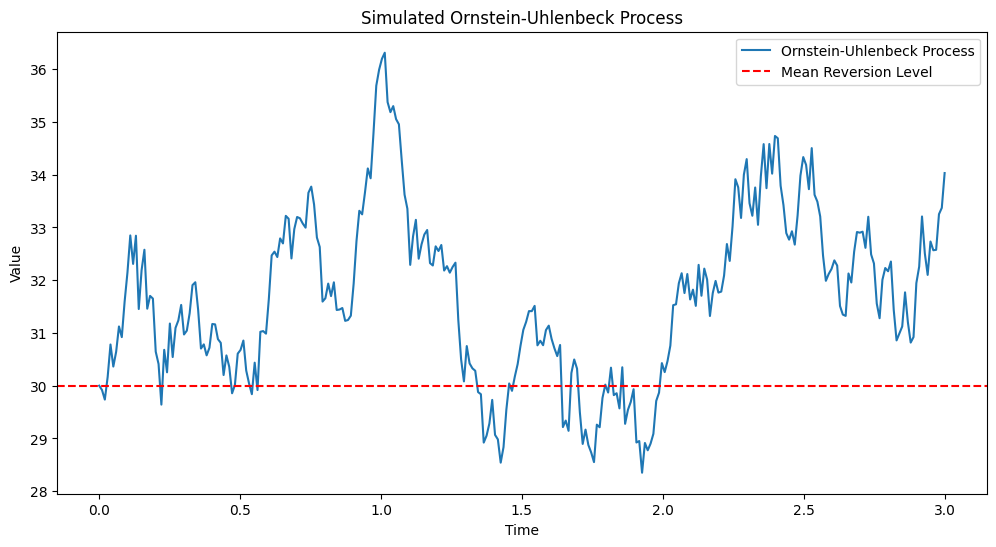

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ornstein_uhlenbeck(mu, theta, sigma, x0, T, dt):
    n = int(T / dt)
    times = np.linspace(0, T, n)
    x = np.zeros(n)
    x[0] = x0

    for t in range(1, n):
        dx = theta * (mu - x[t-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
        x[t] = x[t-1] + dx

    return times, x

# Parameters
mu = 30       # Mean reversion level
theta = 0.8   # Mean reversion speed
sigma = 5     # Volatility
x0 = 30       # Initial value
T = 3       # Time in years
dt = 0.01     # Time step

times, ou_process = simulate_ornstein_uhlenbeck(mu, theta, sigma, x0, T, dt)

# Plot the simulation
plt.figure(figsize=(12, 6))
plt.plot(times, ou_process, label="Ornstein-Uhlenbeck Process")
plt.axhline(mu, color="red", linestyle="--", label="Mean Reversion Level")
plt.title("Simulated Ornstein-Uhlenbeck Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

## Real VIX Data and Mean Reversion

Next, we fetch real-world VIX data and analyze its mean-reverting behavior. We'll:
1. Plot the historical VIX data.
2. Estimate its mean and variance.
3. Compare its behavior to the Ornstein-Uhlenbeck process.


[*********************100%***********************]  1 of 1 completed
C:\Users\Roman\AppData\Local\Temp\ipykernel_22332\3903832211.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axhline(vix_data["Close"].mean()[0], color="red", linestyle="--", label="Mean Level")


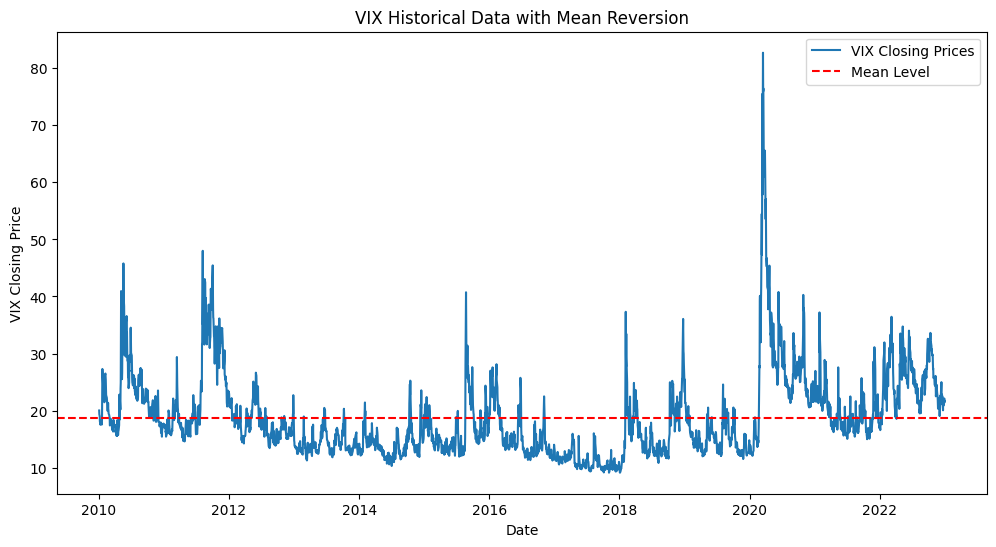

In [5]:
import yfinance as yf
import pandas as pd

# Fetch VIX data
vix_data = yf.download("^VIX", start="2010-01-01", end="2023-01-01")
vix_data["Mean"] = vix_data["Close"].mean()

# Plot VIX data with mean
plt.figure(figsize=(12, 6))
plt.plot(vix_data["Close"], label="VIX Closing Prices")
plt.axhline(vix_data["Close"].mean()[0], color="red", linestyle="--", label="Mean Level")
plt.title("VIX Historical Data with Mean Reversion")
plt.xlabel("Date")
plt.ylabel("VIX Closing Price")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


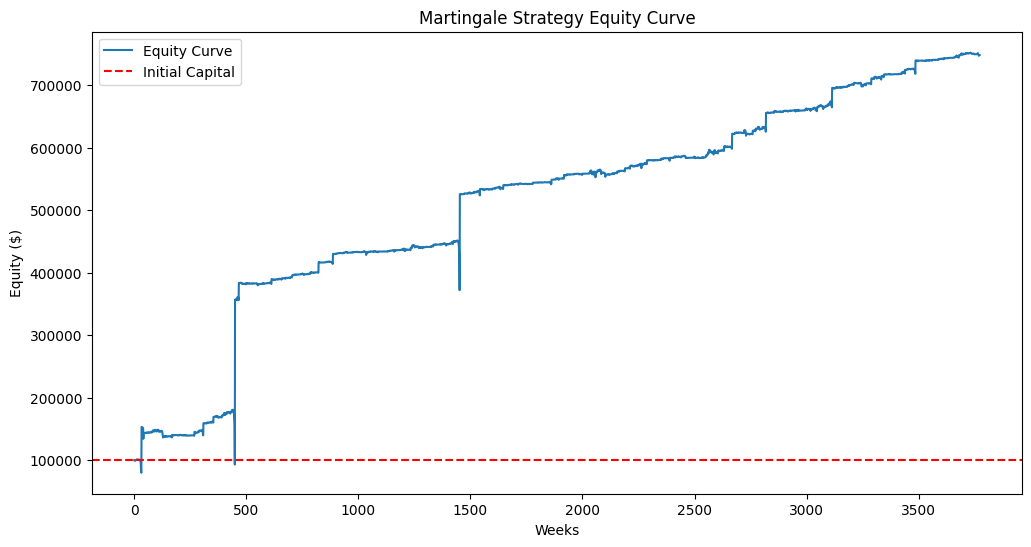

Final Capital: 748368.0539131165
Max Exposure: 1655808.0078125


In [85]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Download VIX data from Yahoo Finance
data = yf.download("^VIX", start="2010-01-01", end="2025-01-01")
prices = data['Close'].dropna().values

# Martingale strategy simulation
initial_capital = 100000  # Initial capital
position = 0
capital = initial_capital
max_exposure = 0
profit_loss = 0

equity_curve = []
positions = []

for i in range(1, len(prices)):
    previous_price = prices[i - 1][0]
    current_price = prices[i][0]

    # Calculate P&L for the current position
    profit_loss = position * (previous_price - current_price)
    capital += profit_loss

    if profit_loss >= 0:  # Close profitable position and restart
        position = -100  # Start with a short position of 100 contracts
    else:  # Double down to cover losses
        position *= 2

    # Update maximum exposure
    max_exposure = max(max_exposure, abs(position * current_price))

    equity_curve.append(capital)
    positions.append(position)

# Plot the equity curve
plt.figure(figsize=(12, 6))
plt.plot(equity_curve, label='Equity Curve')
plt.axhline(initial_capital, color='r', linestyle='--', label='Initial Capital')
plt.title('Martingale Strategy Equity Curve')
plt.xlabel('Weeks')
plt.ylabel('Equity ($)')
plt.legend()
plt.show()

# Results
print("Final Capital:", capital)
print("Max Exposure:", max_exposure)
